<a href="https://colab.research.google.com/github/Gabriel-dev-bot/Emptech-2/blob/main/Hands_on_Activity_8_1_Saving_Models_Pabilan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Pabilan, Gabriel G.

Course and Section: CPE019-CPE32S1

Date of Submission: 07/08/2024

Instructor: Engr. Roman Richard

Explain your datasets and the problem being addressed.

This activity uses a classification dataset. It spots real websites and fake ones trying to steal info. Cybersecurity pros deal with this problem all the time. Bad guys make fake sites to trick people. They want your passwords, credit cards, and personal stuff. It's a sneaky game of cat and mouse online.

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
pima_indians_diabetes = fetch_ucirepo(id=159)

# data (as pandas dataframes)
X = pima_indians_diabetes.data.features
y = pima_indians_diabetes.data.targets

# metadata
print(pima_indians_diabetes.metadata)

# variable information
print(pima_indians_diabetes.variables)

{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

Save a model in HDF5 format:

In [ ]:
# MLP for Pima Indians Dataset Save to HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import os
import pandas as pd
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/379/data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# create model
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=50, batch_size=128, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model to HDF5
model.save("pima_indians_diabetes_model.h5")
print("Saved model to disk")

accuracy: 90.98%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# MLP for Pima Indians Dataset Save to HDF5
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import os
import pandas as pd

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/379/data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model to HDF5
model.save("pima_indians_diabetes_model.h5")
print("Saved model to disk")

accuracy: 90.61%
Saved model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# serialize model to YAML
model_yaml = model.to_json()
with open("pima_indians_diabetes_model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [ ]:
import yaml

# Read the contents of the YAML file
with open('pima_indians_diabetes_model.yaml', 'r') as yaml_file:
    model_yaml_content = yaml.safe_load(yaml_file)

# Print the parsed YAML content with indentation
print(yaml.dump(model_yaml_content, indent=4))

backend: tensorflow
class_name: Sequential
config:
    layers:
    -   class_name: InputLayer
        config:
            batch_input_shape:
            - null
            - 8
            dtype: float32
            name: dense_4_input
            ragged: false
            sparse: false
        module: keras.layers
        registered_name: null
    -   build_config:
            input_shape:
            - null
            - 8
        class_name: Dense
        config:
            activation: relu
            activity_regularizer: null
            batch_input_shape:
            - null
            - 8
            bias_constraint: null
            bias_initializer:
                class_name: Zeros
                config: {}
                module: keras.initializers
                registered_name: null
            bias_regularizer: null
            dtype: float32
            kernel_constraint: null
            kernel_initializer:
                class_name: GlorotUniform
                co

Checkpoint Neural Network Model Improvements:

In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

seed = 42
tf.random.set_seed(seed)

# load pima indians dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/379/data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# create model
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="pima_indians_diabetes_weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.87919, saving model to pima_indians_diabetes_weights-improvement-01-0.88.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.87919

Epoch 3: val_accuracy did not improve from 0.87919

Epoch 4: val_accuracy did not improve from 0.87919

Epoch 5: val_accuracy did not improve from 0.87919

Epoch 6: val_accuracy did not improve from 0.87919

Epoch 7: val_accuracy did not improve from 0.87919

Epoch 8: val_accuracy did not improve from 0.87919

Epoch 9: val_accuracy did not improve from 0.87919

Epoch 10: val_accuracy did not improve from 0.87919

Epoch 11: val_accuracy did not improve from 0.87919

Epoch 12: val_accuracy did not improve from 0.87919

Epoch 13: val_accuracy did not improve from 0.87919

Epoch 14: val_accuracy did not improve from 0.87919

Epoch 15: val_accuracy did not improve from 0.87919

Epoch 16: val_accuracy did not improve from 0.87919

Epoch 17: val_accuracy did not improve from 0.87919

Epoch 18: val_accuracy did not improve from 0.87919

Epoch 19: val_accuracy did not improve from 0.87919

Epoch 20: val_accuracy did not improve from 0.87919



Load a saved Neural Network model:

In [ ]:
# Load a saved Neural Network model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy
import pandas as pd

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load model
model = load_model("pima_indians_diabetes_model.h5")
print("Loaded model from disk")

# load pima indians dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/379/data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# estimate accuracy on whole dataset using loaded model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Loaded model from disk
accuracy: 90.61%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


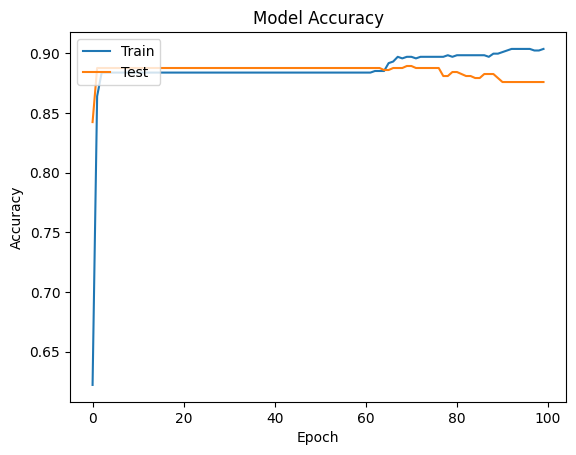

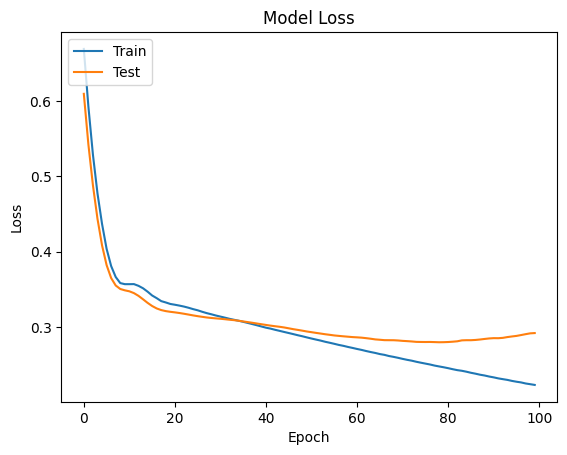

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Pima Indians Diabetes dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/static/public/379/data.csv", delimiter=",")

# Split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

# Create model
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.44, epochs=100, batch_size=512, verbose=0)

# List all data in history
print(history.history.keys())

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Show the application of Dropout Regularization:

In [ ]:
!pip install scikeras

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
dataframe = read_csv("https://archive.ics.uci.edu/static/public/379/data.csv")
dataset = dataframe.values

# Split the dataset into input (X) and output (Y) variables
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Define the baseline model
def create_baseline():
    # Create model
    model = Sequential()
    model.add(Dense(128, input_dim=8, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    sgd = SGD(learning_rate=0.01, momentum=0.8)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Create a pipeline for standardization and model training
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=50, batch_size=64, verbose=0)))
pipeline = Pipeline(estimators)

# Evaluate the model using cross-validation
results = cross_val_score(pipeline, X, encoded_Y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Print the mean and standard deviation of the accuracy scores
print("Baseline: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Baseline: 88.17% (0.56%)


Show the application of Dropout on the visible layer:

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

# load dataset
dataframe = read_csv("https://archive.ics.uci.edu/static/public/379/data.csv")
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:, 0:8].astype(float)
Y = dataset[:, 8]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(8,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0)))
pipeline = Pipeline(estimators)
results = cross_val_score(pipeline, X, encoded_Y)
print("Visible: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` o

Visible: 88.54% (0.34%)


Show the application of Dropout on the hidden layer:

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

# Load dataset
dataframe = read_csv("https://archive.ics.uci.edu/static/public/379/data.csv")
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:, 0:8].astype(float)
Y = dataset[:, 8]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Dropout in hidden layers with weight constraint
def create_model():
    # Create model
    model = Sequential()
    model.add(Dense(128, input_shape=(8,), activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Define pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0)))
pipeline = Pipeline(estimators)

# Evaluate using k-fold cross validation
results = cross_val_score(pipeline, X, encoded_Y)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

Hidden: 88.17% (0.61%)


Show the application of a time-based learning rate schedule:

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
import math

# Load dataset
dataframe = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

# Encode class values as integers
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# Time-based learning rate schedule
def time_based_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * math.pow(1 - k, epoch)
    return lrate

# Create model
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model with SGD optimizer
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Define learning rate scheduler
lrs = LearningRateScheduler(time_based_decay)

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=32, verbose=2, callbacks=[lrs])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 - 2s - 111ms/step - accuracy: 0.5536 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.1000
Epoch 2/50
17/17 - 1s - 39ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0900
Epoch 3/50
17/17 - 0s - 5ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0810
Epoch 4/50
17/17 - 0s - 9ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0729
Epoch 5/50
17/17 - 0s - 10ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0656
Epoch 6/50
17/17 - 0s - 10ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0590
Epoch 7/50
17/17 - 0s - 7ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - learning_rate: 0.0531
Epoch 8/50
17/17 - 0s - 9ms/step - accuracy: 0.6413 - loss: nan - val_accuracy: 0.6732 - val_loss: nan - l

Show the application of a drop-based learning rate schedule:

In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
import math

# Load dataset
dataframe = read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
dataset = dataframe.values

# Split into input (X) and output (Y) variables
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]

# Encode class values as integers
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

# Drop-based learning rate schedule
def drop_based_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# Create model
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model with SGD optimizer
sgd = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Define learning rate scheduler
lrs = LearningRateScheduler(drop_based_decay)

# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=32, verbose=2, callbacks=[lrs])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 - 2s - 112ms/step - accuracy: 0.5497 - loss: 1765.2778 - val_accuracy: 0.6693 - val_loss: 0.7160 - learning_rate: 0.1000
Epoch 2/50
17/17 - 1s - 43ms/step - accuracy: 0.6277 - loss: 27.9585 - val_accuracy: 0.6732 - val_loss: 0.6399 - learning_rate: 0.1000
Epoch 3/50
17/17 - 0s - 7ms/step - accuracy: 0.6413 - loss: 0.6544 - val_accuracy: 0.6732 - val_loss: 0.6345 - learning_rate: 0.1000
Epoch 4/50
17/17 - 0s - 9ms/step - accuracy: 0.6413 - loss: 0.6534 - val_accuracy: 0.6732 - val_loss: 0.6332 - learning_rate: 0.1000
Epoch 5/50
17/17 - 0s - 6ms/step - accuracy: 0.6413 - loss: 0.6532 - val_accuracy: 0.6732 - val_loss: 0.6389 - learning_rate: 0.1000
Epoch 6/50
17/17 - 0s - 8ms/step - accuracy: 0.6413 - loss: 0.6536 - val_accuracy: 0.6732 - val_loss: 0.6344 - learning_rate: 0.1000
Epoch 7/50
17/17 - 0s - 7ms/step - accuracy: 0.6413 - loss: 0.6530 - val_accuracy: 0.6732 - val_loss: 0.6328 - learning_rate: 0.1000
Epoch 8/50
17/17 - 0s - 7ms/step - accuracy: 0.6413 - loss: 0.

In this activity its hard to fix the code but at the same time it was enjoying I learn a lot of in this activity like the basic principles of neural network modeling and training throughout this set of assignments. I was able to apply the model that checkpointing to track progress, Models get saved and loaded in many ways. You can check out training info to spot trends. I tweak learning rates and use dropout to stop overfitting. This helps the model learn better. These tricks show I know how to make models work well.

